In [1]:
import sys
sys.path.insert(0, '/home/niell_lab/Documents/github/FreelyMovingEphys/')
import pandas as pd
import xarray as xr
from utils.format_data import *
from utils.paths import find
import os
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
from utils.time import open_time

In [3]:
recording_directory = '/home/niell_lab/data/object_avoidance/recordings/'

In [4]:
task_h5s = [i for i in find('*.h5', recording_directory) if 'DLC' not in i]

In [5]:
task_h5s

['/home/niell_lab/data/object_avoidance/recordings/090221/G6CK3LT/oa/G6CK3LT_090221_oa.h5',
 '/home/niell_lab/data/object_avoidance/recordings/090321/G6CK3LT/oa/G6CK3LT_090321_oa.h5',
 '/home/niell_lab/data/object_avoidance/recordings/090321/G6CK3RT/oa/G6CK3RT_090321_oa.h5',
 '/home/niell_lab/data/object_avoidance/recordings/090721/G6CK3LT/oa/G6CK3LT_090721_oa.h5',
 '/home/niell_lab/data/object_avoidance/recordings/090721/G6CK3RT/oa/G6CK3RT_090721_oa.h5',
 '/home/niell_lab/data/object_avoidance/recordings/091321/G6CK3LT/oa/G6CK3LT_091321_oa.h5',
 '/home/niell_lab/data/object_avoidance/recordings/091321/G6CK3RT/oa1/G6CK3RT_091321_oa.h5',
 '/home/niell_lab/data/object_avoidance/recordings/091321/G6CK3RT/oa1/G6CK3RT_091321_oa1.h5',
 '/home/niell_lab/data/object_avoidance/recordings/090621/G6CK3LT/oa/G6CK3LT_090621_oa.h5',
 '/home/niell_lab/data/object_avoidance/recordings/090621/G6CK3RT/oa/G6CK3RT_090621_oa.h5',
 '/home/niell_lab/data/object_avoidance/recordings/090821/G6CK3LT/oa/G6CK3LT_

In [109]:
pdf = PdfPages('/home/niell_lab/data/object_avoidance/recordings/speed_summary.pdf')
for task_h5 in task_h5s:
    df = pd.read_hdf(task_h5)
    plt.subplots(2,3,figsize=(15,8))
    median_speed = []; max_speed = []; time_active = []
    for ind, row in df.iterrows():
        median_speed.append(np.median(row['speed']))
        max_speed.append(np.max(row['speed']))
        time_active.append(np.sum(row['speed']>5)/60)
    plt.subplot(2,3,1)
    plt.title(os.path.split(task_h5)[1])
    slow = df['speed'].iloc[np.nanargmin(median_speed)]
    slowT = np.linspace(0,1,len(slow))
    med = df['speed'].iloc[np.argsort(median_speed)[len(median_speed)//2]]
    medT = np.linspace(0,1,len(med))
    fast = df['speed'].iloc[np.nanargmax(median_speed)]
    fastT = np.linspace(0,1,len(fast))
    fake_time = np.linspace(0,1,100)
    plt.plot(interp1d(slowT, slow, bounds_error=False)(fake_time))
    plt.plot(interp1d(medT, med, bounds_error=False)(fake_time))
    plt.plot(interp1d(fastT, fast, bounds_error=False)(fake_time))
    plt.subplot(2,3,2)
    plt.hist(median_speed); plt.xlabel('median speed (cm/sec)')
    plt.subplot(2,3,3)
    plt.hist(max_speed); plt.xlabel('max speed (cm/sec)')
    plt.subplot(2,3,4)
    plt.hist(time_active); plt.xlabel('time active (sec)')
    plt.subplot(2,3,5)
    plt.plot([i for i in max_speed if ~np.isnan(i)]); plt.xlabel('trial'); plt.ylabel('max speed (cm/sec)')
    plt.subplot(2,3,6)
#     plt.plot([i for i in time_active if ~np.isnan(i)]); plt.xlabel('trial'); plt.ylabel('time active (sec)')
    plt.tight_layout()
    pdf.savefig()
    plt.close()
pdf.close()

/tmp/ipykernel_326273/1894181097.py:9: RuntimeWarning: invalid value encountered in greater
  time_active.append(np.sum(row['speed']>5)/60)
/home/niell_lab/anaconda3/envs/DLC-GPU1/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_326273/1894181097.py:9: RuntimeWarning: invalid value encountered in greater
  time_active.append(np.sum(row['speed']>5)/60)
/home/niell_lab/anaconda3/envs/DLC-GPU1/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_326273/1894181097.py:9: RuntimeWarning: invalid value encountered in greater
  time_active.append(np.sum(row['speed']>5)/60)
/home/niell_lab/anaconda3/envs/DLC-GPU1/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufu

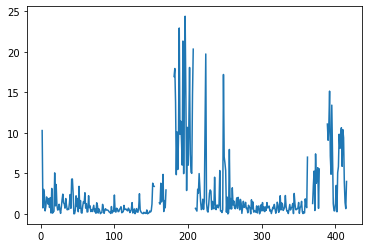

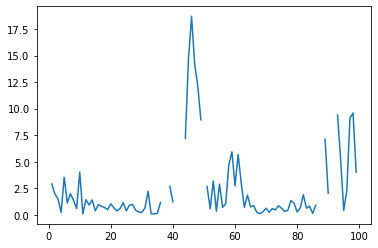

In [171]:
plt.figure()
plt.plot(slow)
plt.figure()
plt.plot(interp1d(slowT, slow, bounds_error=False)(fake_time))

In [110]:
df.columns.values

array(['first_poke', 'second_poke', 'trail_timestamps', 'nose_x',
       'nose_y', 'nose_likelihood', 'leftear_x', 'leftear_y',
       'leftear_likelihood', 'rightear_x', 'rightear_y',
       'rightear_likelihood', 'spine_x', 'spine_y', 'spine_likelihood',
       'midspine_x', 'midspine_y', 'midspine_likelihood', 'tailbase_x',
       'tailbase_y', 'tailbase_likelihood', 'midtail_x', 'midtail_y',
       'midtail_likelihood', 'tailend_x', 'tailend_y',
       'tailend_likelihood', 'arenaTL_x', 'arenaTL_y',
       'arenaTL_likelihood', 'arenaTR_x', 'arenaTR_y',
       'arenaTR_likelihood', 'arenaBL_x', 'arenaBL_y',
       'arenaBL_likelihood', 'arenaBR_x', 'arenaBR_y',
       'arenaBR_likelihood', 'obstaclewTL_x', 'obstaclewTL_y',
       'obstaclewTL_likelihood', 'obstaclewTR_x', 'obstaclewTR_y',
       'obstaclewTR_likelihood', 'obstaclewBR_x', 'obstaclewBR_y',
       'obstaclewBR_likelihood', 'obstaclewBL_x', 'obstaclewBL_y',
       'obstaclewBL_likelihood', 'obstaclebTL_x', 'obstaclebTL

In [7]:
import numpy as np

In [9]:
df = pd.read_hdf(task_h5s[-2])

In [110]:
def get_head_angle(df):
    for ind, row in df.iterrows():
        leftear_x = row['leftear_x_cm']
        leftear_y = row['leftear_y_cm']
        rightear_x = row['rightear_x_cm']
        rightear_y = row['rightear_y_cm']
        nose_x = row['nose_x_cm']
        nose_y = row['nose_y_cm']
        angs = []
        for step in range(len(leftear_x)):
            ang = (np.nanmean([leftear_y[step],rightear_y[step]])-nose_y[step])/(np.nanmean([leftear_x[step],rightear_x[step]])-nose_x[step])
            angs.append(ang)
        df.at[ind, 'head_angle'] = np.array(angs).astype(object)
    return df

In [111]:
df = get_head_angle(df)

/tmp/ipykernel_346547/1362453808.py:11: RuntimeWarning: Mean of empty slice
  ang = (np.nanmean([leftear_y[step],rightear_y[step]])-nose_y[step])/(np.nanmean([leftear_x[step],rightear_x[step]])-nose_x[step])


In [154]:
def get_median_trace(df):
    fake_time = np.linspace(0,1,100)
    all_nose_positions = np.zeros([len(df), 2, 100])
    count = 0
    for ind, row in df.iterrows():
        xT = np.linspace(0,1,len(row['nose_x'])); yT = np.linspace(0,1,len(row['nose_y']))
        all_nose_positions[count,0,:] = interp1d(xT, row['nose_x_cm'], bounds_error=False)(fake_time)
        all_nose_positions[count,1,:] = interp1d(yT, row['nose_y_cm'], bounds_error=False)(fake_time)
        count += 1
    median_trace = np.nanmedian(all_nose_positions, axis=0)
    for ind, row in df.iterrows():
        df.at[ind,'median_x_cm'] = median_trace[0,:].astype(object); df.at[ind,'median_y_cm'] = median_trace[1,:].astype(object)
    return df

In [147]:
df = get_median_trace(df)

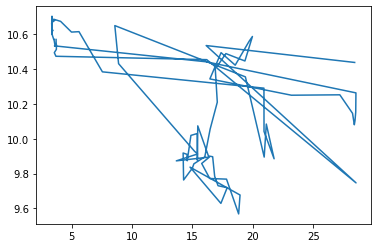

In [155]:
plt.plot(get_median_trace(df[])['median_x_cm'].iloc[0], get_median_trace(df)['median_y_cm'].iloc[0])

In [197]:
df.index%2==0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False,  True,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
       False, False,  True, False,  True, False,  True, False, False,
        True,  True,

In [152]:
get_median_trace(df)['median_x_cm'].iloc[0]

array([28.431732557969617, 16.13873114685484, 28.544619360338142,
       16.185954201978973, 3.7029708099076286, 3.56769531895732,
       3.7392258869624646, 3.7437985782590815, 3.6337923875907894,
       3.536399099834738, 3.5193102943385095, 3.3835997222831558,
       3.375408773224166, 3.460630949715513, 3.3636485415520743,
       3.3804080027682506, 3.3764606976237177, 3.3687553174812948,
       3.377106188314046, 3.3897892024714382, 3.3644293429146694,
       3.3494711232813135, 3.364020337896335, 3.3531653825696344,
       3.3918268061993926, 3.397960673295035, 3.3683458107705375,
       3.370941989956437, 3.363073782991905, 3.3633085826306166,
       3.3753687732764845, 3.3721118315795167, 3.374609519765971,
       3.3783358559458323, 3.3939907118073878, 3.604037740337838,
       3.453171811699883, 3.548747772292095, 3.516901366702356,
       4.08946684617019, 4.991724398814895, 5.610375615105726,
       7.550303187463188, 20.921601206897183, 20.92834731645358,
       21.7623536

In [153]:
get_median_trace(df)['median_y_cm'].iloc[0]

array([28.431732557969617, 16.13873114685484, 28.544619360338142,
       16.185954201978973, 3.7029708099076286, 3.56769531895732,
       3.7392258869624646, 3.7437985782590815, 3.6337923875907894,
       3.536399099834738, 3.5193102943385095, 3.3835997222831558,
       3.375408773224166, 3.460630949715513, 3.3636485415520743,
       3.3804080027682506, 3.3764606976237177, 3.3687553174812948,
       3.377106188314046, 3.3897892024714382, 3.3644293429146694,
       3.3494711232813135, 3.364020337896335, 3.3531653825696344,
       3.3918268061993926, 3.397960673295035, 3.3683458107705375,
       3.370941989956437, 3.363073782991905, 3.3633085826306166,
       3.3753687732764845, 3.3721118315795167, 3.374609519765971,
       3.3783358559458323, 3.3939907118073878, 3.604037740337838,
       3.453171811699883, 3.548747772292095, 3.516901366702356,
       4.08946684617019, 4.991724398814895, 5.610375615105726,
       7.550303187463188, 20.921601206897183, 20.92834731645358,
       21.7623536

In [10]:
fake_time = np.linspace(0,1,100)
all_nose_positions = np.zeros([len(df), 2, 100])
count = 0
for ind, row in df.iterrows():
    xT = np.linspace(0,1,len(row['nose_x'])); yT = np.linspace(0,1,len(row['nose_y']))
    all_nose_positions[count,0,:] = interp1d(xT, row['nose_x_cm'], bounds_error=False)(fake_time)
    all_nose_positions[count,1,:] = interp1d(yT, row['nose_y_cm'], bounds_error=False)(fake_time)
    count += 1
median_trace = np.nanmedian(all_nose_positions, axis=0)
df1['median_x_cm'] = median_trace[0,:]; df1['median_y_cm'] = median_trace[0,:]

In [12]:
np.shape(all_nose_positions)

(144, 2, 100)

In [16]:
median_trace = np.nanmedian(all_nose_positions, axis=0)
median_trace

array([[28.43173256, 16.13873115, 28.54461936, 16.1859542 ,  3.70297081,
         3.56769532,  3.73922589,  3.74379858,  3.63379239,  3.5363991 ,
         3.51931029,  3.38359972,  3.37540877,  3.46063095,  3.36364854,
         3.380408  ,  3.3764607 ,  3.36875532,  3.37710619,  3.3897892 ,
         3.36442934,  3.34947112,  3.36402034,  3.35316538,  3.39182681,
         3.39796067,  3.36834581,  3.37094199,  3.36307378,  3.36330858,
         3.37536877,  3.37211183,  3.37460952,  3.37833586,  3.39399071,
         3.60403774,  3.45317181,  3.54874777,  3.51690137,  4.08946685,
         4.9917244 ,  5.61037562,  7.55030319, 20.92160121, 20.92834732,
        21.76235368, 21.11758376, 20.9422373 , 19.385324  ,  8.5775351 ,
         8.88855931, 15.16965316, 15.42594525, 13.66791101, 16.40628344,
        15.76762633, 16.43530276, 17.82277884, 18.82706385, 18.94311206,
        14.80403344, 17.35785997, 17.87774452, 17.12211444, 16.84261924,
        16.6766745 , 16.32605875, 15.44379704, 15.4

In [17]:
np.shape(median_trace)

(2, 100)

In [121]:
df['head_angle']

2      [-0.36636118848783916, -0.3567701580747283, -0...
3      [-0.10513130410013764, -0.13449284000146972, -...
4      [-0.3683619776346441, -0.48494011250763325, -0...
5      [-0.21178297627246576, -0.24347501839519511, -...
6      [-0.4956140245306518, -0.4752761936391149, -0....
                             ...                        
148    [-0.715732414650683, -0.5862546900747043, -0.5...
151    [-0.18470481082327772, -0.1487458282180388, -0...
152    [-0.7725173070014467, -0.7803152955791409, -0....
153    [-0.15183659664220234, -0.17609232950780498, -...
159    [-0.1502415990987545, -0.15493348637390528, -0...
Name: head_angle, Length: 144, dtype: object

In [18]:
def format_frames(vid_path):
    # open the .avi file
    vidread = cv2.VideoCapture(vid_path)
    # empty array that is the target shape
    # should be number of frames x downsampled height x downsampled width
    all_frames = np.empty([int(vidread.get(cv2.CAP_PROP_FRAME_COUNT)),
                        int(vidread.get(cv2.CAP_PROP_FRAME_HEIGHT)),
                        int(vidread.get(cv2.CAP_PROP_FRAME_WIDTH))], dtype=np.uint8)
    # iterate through each frame
    for frame_num in tqdm(range(0,int(vidread.get(cv2.CAP_PROP_FRAME_COUNT)))):
        # read the frame in and make sure it is read in correctly
        ret, frame = vidread.read()
        if not ret:
            break
        # convert to grayyscale
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # add the downsampled frame to all_frames as int8
        all_frames[frame_num,:,:] = frame.astype(np.int8)
    return all_frames

In [19]:
vid = format_frames('/home/niell_lab/data/object_avoidance/recordings/090921/G6CK3RT/oa1/090921_G6CK3RT_control_Rig2_oa1_top1.avi')

100%|███████████████████████████████████| 48452/48452 [00:27<00:00, 1730.78it/s]


In [20]:
timestamps = open_time('/home/niell_lab/data/object_avoidance/recordings/090921/G6CK3RT/oa1/090921_G6CK3RT_control_Rig2_oa1_top1_BonsaiTS.csv')

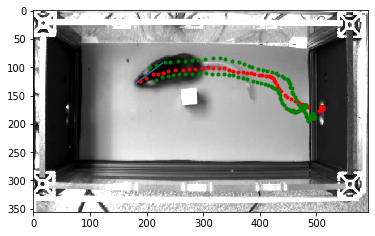

In [206]:
def get_row_for_timestamp(df, seek_timestamp):
    for ind, row in df.iterrows():
        if seek_timestamp in row['trail_timestamps']:
            return row

def plot_frame(vid_arr, timestamps, df, seek_frame):
    seek_timestamp = timestamps[seek_frame]
    row = get_row_for_timestamp(df, seek_timestamp)
    row_time_index = np.where(row['trail_timestamps']==seek_timestamp)
    current_ang = row['head_angle'][row_time_index][0]
    x1 = row['nose_x'][row_time_index]
    y1 = row['nose_y'][row_time_index]
    x2 = x1+60 * np.cos(current_ang)
    y2 = y1+60 * np.sin(current_ang)
    frame = vid_arr[seek_frame,:,:]
    plt.figure()
    plt.imshow(frame, cmap='gray')
    plt.plot((x1,x2), (y1,y2), '-')
    row_time_index = row_time_index[0][0]
    plt.plot(row['nose_x'][:row_time_index], row['nose_y'][:row_time_index],'r.')
    plt.plot(row['leftear_x'][:row_time_index], row['leftear_y'][:row_time_index], 'g.')
    plt.plot(row['rightear_x'][:row_time_index], row['rightear_y'][:row_time_index], 'g.')
    plt.show()
    
plot_frame(vid, timestamps, df, 8298)

In [180]:
def distance_from_nose(row, target):
    x_dist = np.abs(row[target+'_x_cm'] - row['nose_x_cm'])
    y_dist = np.abs(row[target+'_y_cm'] - row['nose_y_cm'])
    length = len(x_dist)
    dist = np.zeros([length])
    for i in range(length):
        dist[i] = np.sqrt(x_dist[i]**2 + y_dist[i]**2)
    return dist

In [200]:
dist = distance_from_nose(df.iloc[0], 'leftportT')
if np.nanmean(dist[:10]) > np.nanmean(dist[:-10]):
    correct_direction = True
correct_direction

True

In [187]:
def angle_from_nose(row, target):
    x_dist = np.abs(row[target+'_x_cm'] - row['nose_x_cm'])
    y_dist = np.abs(row[target+'_y_cm'] - row['nose_y_cm'])
    length = len(x_dist)
    ang = np.zeros([length])
    for i in range(length):
        ang[i] = (y_dist[i]/x_dist[i])
    return ang%(2*np.pi)

/tmp/ipykernel_346547/1662500509.py:8: RuntimeWarning: invalid value encountered in remainder
  return ang%(2*np.pi)


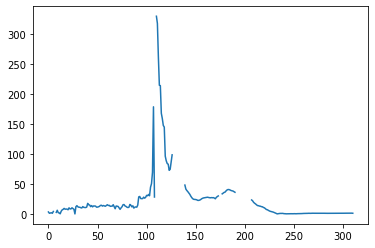

In [188]:
plt.plot(np.rad2deg(angle_from_nose(df.iloc[0], 'leftportT')))

In [79]:
a = -1.5736617858716084
x1 = 512
y1 = 173
x2 = x1*np.sin(a)
y2 = y1*np.cos(a)
# plt.plot([x, y], [x*np.arccos(a), y*np.sin(a)], '-')

In [22]:
row = get_row_for_timestamp(df, 55150.642521)
print(row)

first_poke                                               55146.933964
second_poke                                              55151.935667
trail_timestamps    [55146.941337, 55146.95767, 55146.975475, 5514...
nose_x              [57.40630340576172, 58.116050720214844, 58.682...
nose_y              [188.2172393798828, 184.6667938232422, 184.449...
                                          ...                        
wobstacle_y                                                 12.551835
wobstacle_y_std                                              0.037879
speed               [2.4439901903433685, 1.7883466554213494, nan, ...
obstacle_cluster                                                    2
head_angle          [1.0733610796107746, 1.0909471724972652, 1.093...
Name: 8, Length: 138, dtype: object


In [155]:
for ind, row in df.iterrows():
    print(np.min(row['trail_timestamps']),np.max(row['trail_timestamps']))

44348.024384 44352.024089
44364.295718 44368.530086
44368.546508 44373.282252
44373.298739 44379.36768
44379.384371 44385.202995
44385.219737 44388.820928
44388.837619 44396.006656
44404.492748 44408.078873
44408.094246 44411.862246
44411.877913 44415.379072
44415.396377 44418.58016
44418.597427 44421.932185
44421.948019 44425.265932
44425.282854 44430.118374
44430.135014 44434.002982
44434.018816 44437.370636
44437.389785 44440.72206
44440.738777 44444.205504
44444.222246 44448.759756
44448.773862 44452.242572
44452.259328 44456.310617
44456.32736 44459.628492
44459.645184 44463.446451
44463.462515 44467.864627
44467.881292 44471.401817
44471.415833 44476.267443
44476.284147 44482.020889
44482.036185 44486.771046
44486.78784 44490.922483
44490.940249 44494.373696
44494.389862 44497.858355
44497.874918 44501.642739
44501.65952 44505.027302
44505.044044 44508.361804
44508.378547 44511.546214
44511.562048 44515.764313
44515.780953 44519.815667
44519.832192 44523.316147
44523.33326 44527.

In [ ]:
def plot_frame(arr, df):
    # read topdown video in
    vidread = cv2.VideoCapture(vid_path)
    width = int(vidread.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(vidread.get(cv2.CAP_PROP_FRAME_HEIGHT))
    num_frames = int(vidread.get(cv2.CAP_PROP_FRAME_COUNT))
    # setup the file to save out of this
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out_vid = cv2.VideoWriter(savepath, fourcc, 60.0, (width, height))
    for frame_num in tqdm(range(num_frames)):
        ret, frame = vidread.read()
        if not ret:
            break
            topdownTS = dlc_data.isel(frame=frame_num)
                
            td_pts_x = topdownTS.isel(point_loc=k).values
            td_pts_y = topdownTS.isel(point_loc=k + 1).values
            center_xy = (int(td_pts_x), int(td_pts_y))
            frame = cv2.circle(frame, center_xy, 6, plot_color0, -1)

            backX = topdownTS.sel(point_loc='nose_x').values
            backY = topdownTS.sel(point_loc='nose_y').values
            current_ang = head_ang.isel(frame=frame_num)
            x1 = (backX * np.cos(float(current_ang))).astype(int)
            y1 = (backY * np.sin(float(current_ang))).astype(int)
            x2 = (backX + 30 * np.cos(float(current_ang))).astype(int)
            y2 = (backY + 30 * np.sin(float(current_ang))).astype(int)
            frame = cv2.line(frame, (x1,y1), (x2,y2), plot_color1, thickness=4)

            out_vid.write(frame)

    out_vid.release()

In [ ]:
ind = 0
row = df1.iloc[ind]

vid_savepath = '/home/niell_lab/data/object_avoidance/demo/090921_G63CKLT_oa1_plot.avi'

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out_vid = cv2.VideoWriter(vid_savepath, fourcc, 60.0, (np.size(vid_arr, 2), np.size(vid_arr, 1)), False)

for seek_frame in tqmd(range(np.size(vid_arr,0))):
    frame = plot_frame(vid_arr, timestamps, df, seek_frame, return_as_array=True)
    out_vid.write(frame)
out_vid.release()